# Training and testing

In this exercise you will apply the **training and testing** workflow to **titanic** dataset. And we are going to use **Decision Tree** to fit the dataset. 

In [1]:
import os, sys
import numpy as np
import pandas as pd

DATASET = '/dsa/data/all_datasets/titanic_ML/titanic.csv'
assert os.path.exists(DATASET)

Now go ahead and `import DecistionTree`, `train_test_split()`, and other required packages.

In [18]:
# Add your code below this comment (Question #E01)
# ----------------------------------

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Load Dataset

**Load dataset** from files into multi-dimensional array and understand its structure.

Note that this .csv file is comma separated. **Shuffle the dataset using the `.sample()` and `.reset_index()` method.**

In [3]:
# Add your code below this comment (Question #E02)
# ----------------------------------

dataset = pd.read_csv(DATASET, sep=',').sample(frac = 1).reset_index(drop=True)


Print **number of rows**.

In [4]:
# Add your code below this comment (Question #E03)
# ----------------------------------

len(dataset.index)


890

**Describe the dataset**.

In [5]:
# Add your code below this comment (Question #E04)
# ----------------------------------

dataset.describe()


,pclass,sex,age,sibsp,parch,fare,embarked,survived
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,2.312360,0.642697,29.548697,0.503371,0.351685,32.865772,0.895506,0.389888
std,0.837241,0.479475,13.379025,1.095286,0.790069,52.639685,0.529535,0.487999
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000,0.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,13.775000,1.000000,0.000000
75%,3.000000,1.000000,37.000000,1.000000,0.000000,29.925000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000,1.000000


**Store feature columns** (all except column 'survived') to a new variable `X`.

In [6]:
# Add your code below this comment (Question #E05)
# ----------------------------------

X = np.array(dataset.iloc[:,:-1])



**Store label column** (last column 'survived') to a new variable `y`.

In [7]:
# Add your code below this comment (Question #E06)
# ----------------------------------

y = np.array(dataset.survived)



**Create training/test split** off of `X` and `y`. Test dataset ratio: 25%.

In [9]:
# Add your code below this comment (Question #E07)
# ----------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



**Create a decision tree model**, then **fit and score** the classifier.

Note that the model score will not be important for grading purpose in this exercise.

In [10]:
# Add your code below this comment (Question #E08)
# ----------------------------------

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)





0.7130044843049327

**Visualize the decision  tree**


In [14]:
# Add your code below this comment (Question #E09)
# ----------------------------------

export_text(model)

'|--- feature_1 <= 0.50\n|   |--- feature_0 <= 2.50\n|   |   |--- feature_5 <= 26.12\n|   |   |   |--- feature_2 <= 26.50\n|   |   |   |   |--- feature_2 <= 25.50\n|   |   |   |   |   |--- feature_5 <= 23.50\n|   |   |   |   |   |   |--- feature_5 <= 19.88\n|   |   |   |   |   |   |   |--- feature_2 <= 19.50\n|   |   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |   |--- feature_2 >  19.50\n|   |   |   |   |   |   |   |   |--- feature_5 <= 13.40\n|   |   |   |   |   |   |   |   |   |--- feature_2 <= 22.50\n|   |   |   |   |   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |   |   |   |   |--- feature_2 >  22.50\n|   |   |   |   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |   |   |--- feature_5 >  13.40\n|   |   |   |   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |   |--- feature_5 >  19.88\n|   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |--- feature_5 >  23.50\n|   |   |   |   |   |   |--- class: 1\n|   |   |   |   

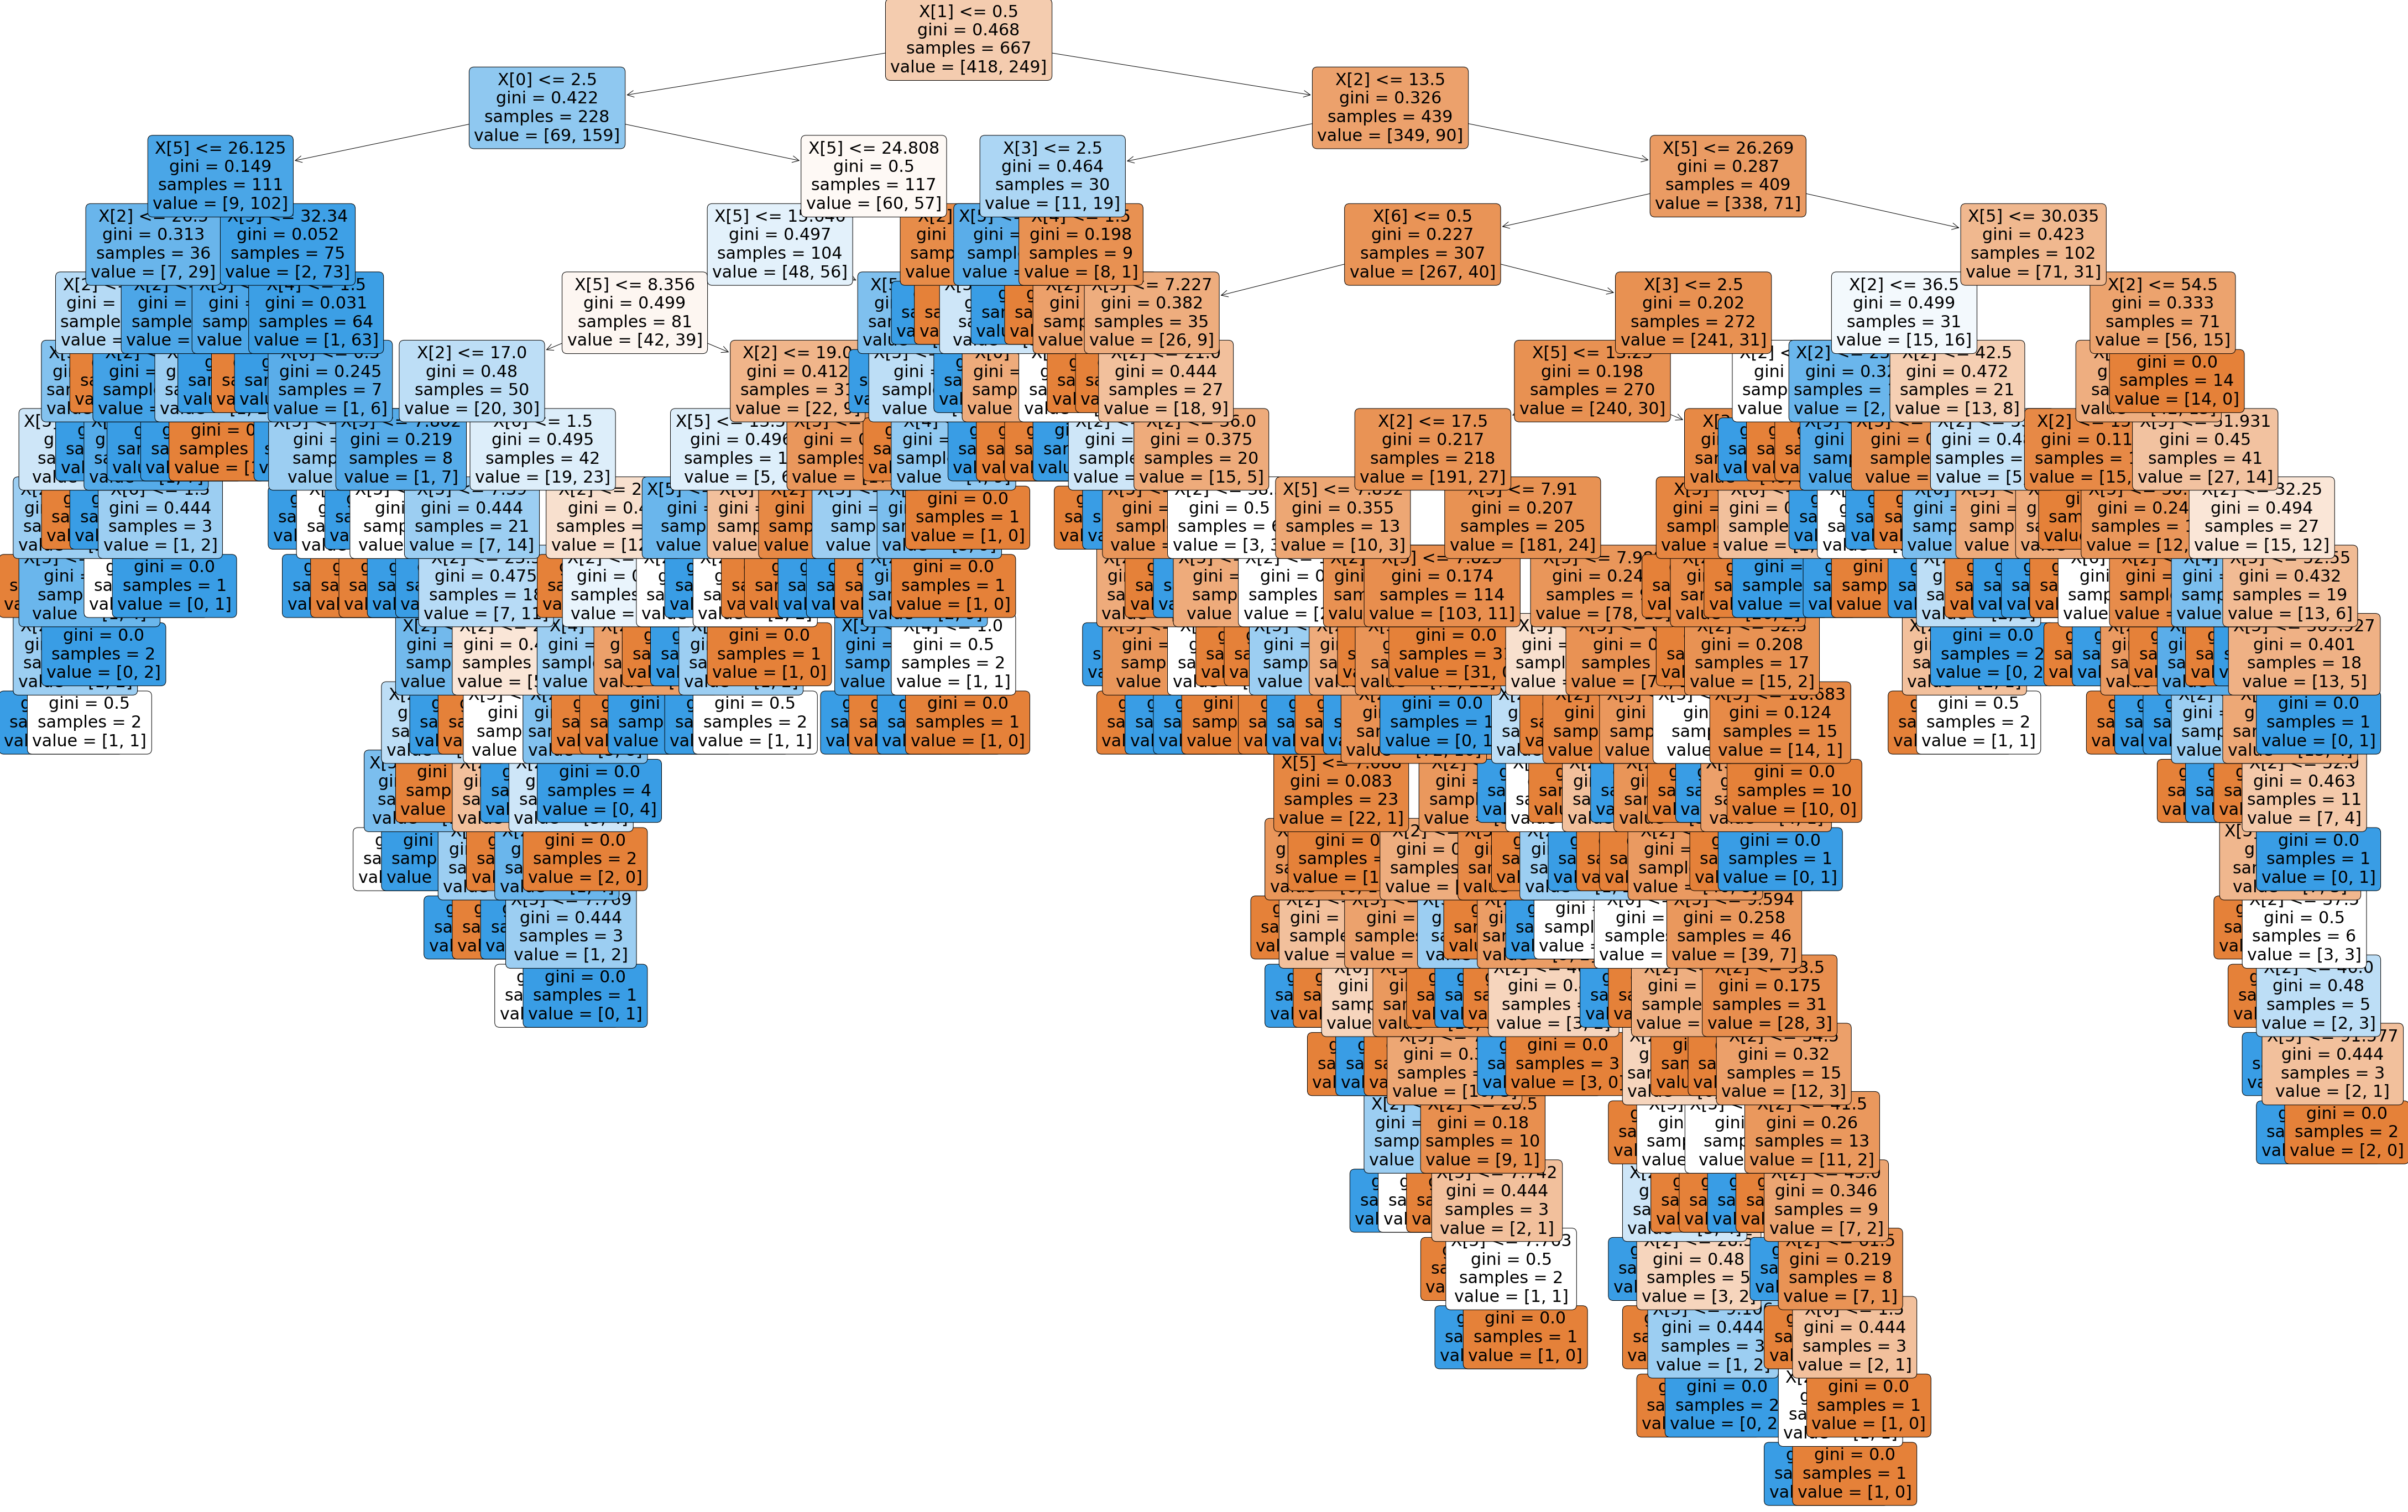

In [27]:
plt.figure(figsize=(75,50))
a = plot_tree(model, 
              filled=True, 
              rounded=True, 
              fontsize=30)

**Compare your decision tree model against a baseline**

In [28]:
# Add your code below this comment (Question #E10)
# ----------------------------------

confusion_matrix(y_test, model.predict(X_test))

array([[97, 28],
       [36, 62]])

# Save your notebook!  Then `File > Close and Halt`